In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
df = pd.read_csv('watch_test2_sample.csv')
df['uts'] = pd.to_datetime(df['uts'])

In [3]:
df = df.drop_duplicates()

In [4]:
df = df.set_index('uts')
df = df.fillna(df.mean())

In [5]:
accelerator_df = df[['accelerateX', 'accelerateY', 'accelerateZ']].copy()
accelerator_df

,accelerateX,accelerateY,accelerateZ
uts,,,
2018-11-18 08:18:41+07:00,-3.957379,-14.204506,2.303692
2018-11-18 08:19:03+07:00,-0.038236,-1.156625,1.883101
2018-11-18 08:19:45+07:00,1.906998,-4.394027,-4.358852
2018-11-18 08:20:13+07:00,-0.265259,-10.149148,3.042116
2018-11-18 08:20:33+07:00,-2.098175,-11.195846,1.754056
...,...,...,...
2018-11-18 16:07:32+07:00,4.803340,0.050184,-8.263658
2018-11-18 16:07:58+07:00,1.780343,-6.609970,2.081448
2018-11-18 16:08:19+07:00,0.399084,-8.364026,-5.357756


In [6]:
accelerator_df -= accelerator_df.mean()

In [7]:
accelerator_df.mean()

accelerateX   -1.133165e-15
accelerateY    6.030437e-16
accelerateZ    8.652365e-16
dtype: float64

In [8]:
accelerator = accelerator_df.to_numpy()

In [9]:
cov = accelerator.T.dot(accelerator)/(len(accelerator) - 1)
cov

array([[25.4476783 ,  3.15359882, -1.82430517],
       [ 3.15359882, 23.14423757,  7.02704944],
       [-1.82430517,  7.02704944, 19.5368561 ]])

In [10]:
eigen_values, eigen_vectors = np.linalg.eig(cov)
eigen_values, eigen_vectors 

(array([13.15046863, 25.75818909, 29.22011425]),
 array([[ 0.26701286, -0.87106272,  0.41225462],
        [-0.60926567,  0.17885949,  0.77253131],
        [ 0.74665888,  0.45744838,  0.48295082]]))

In [11]:
sorted_indexes = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indexes]
eigen_vectors = eigen_vectors[:, sorted_indexes]
eigen_values, eigen_vectors

(array([29.22011425, 25.75818909, 13.15046863]),
 array([[ 0.41225462, -0.87106272,  0.26701286],
        [ 0.77253131,  0.17885949, -0.60926567],
        [ 0.48295082,  0.45744838,  0.74665888]]))

<BarContainer object of 3 artists>

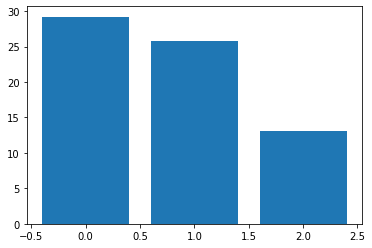

In [12]:
plt.bar(np.arange(len(eigen_values)), eigen_values)

In [13]:
np.sqrt(eigen_values)

array([5.40556327, 5.07525261, 3.62635749])

In [14]:
eigen_vectors = (eigen_vectors.T * np.sqrt(eigen_values)).T
eigen_vectors

array([[ 2.22846844, -4.70858464,  1.44335491],
       [ 3.92079157,  0.9077571 , -3.09217717],
       [ 1.75135233,  1.65887137,  2.70765201]])

In [15]:
scale = 2
ev1, ev2, ev3 = eigen_vectors.T * scale

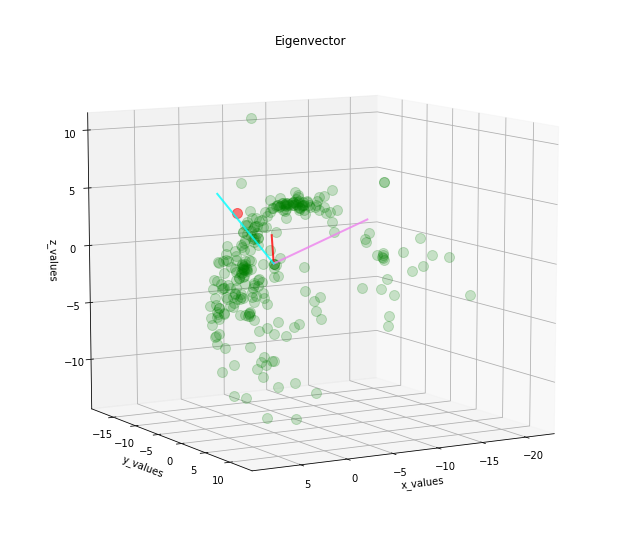

In [17]:
fig = plt.figure(figsize=(50, 10))

ax = fig.add_subplot(141, projection='3d')

ax.plot(accelerator[:, 0],accelerator[:, 1],accelerator[:, 2],'o',markersize=10,color='green',alpha=0.2)

ax.plot([df['accelerateX'].mean()],[df['accelerateY'].mean()],[df['accelerateZ'].mean()],'o',markersize=10,color='red'
        ,alpha=0.5)

ax.plot([0, ev1[0]], [0, ev1[1]], [0, ev1[2]],color='red', alpha=0.8, lw=2)
ax.plot([0, ev2[0]], [0, ev2[1]], [0, ev2[2]],color='violet', alpha=0.8, lw=2)
ax.plot([0, ev3[0]], [0, ev3[1]], [0, ev3[2]],color='cyan', alpha=0.8, lw=2)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvector')

ax.view_init(10, 60)

plt.show()

In [18]:
K = 2
pca = accelerator.dot( eigen_vectors[:, :K])
pca

array([[-5.37811822e+01,  1.49013734e+01],
       [ 5.37392288e+00,  7.59435471e+00],
       [-1.39162216e+01, -1.48583130e+01],
       [-2.83599554e+01,  2.42294504e+00],
       [-3.88042832e+01,  7.96651355e+00],
       [-5.21090850e+01,  4.66019934e+01],
       [ 1.83454424e+01, -1.31337096e+01],
       [-5.67352295e+01,  9.60914170e+01],
       [-2.55461835e+01,  5.46388549e+01],
       [-2.25228300e+01,  5.60560563e+00],
       [ 1.22171468e+00,  1.06332249e+01],
       [-3.69782231e+01,  2.61911370e+01],
       [ 1.07145241e+01,  1.06019548e+00],
       [-1.68749714e+01,  1.98803977e+00],
       [ 3.51453509e+01, -1.84538192e+01],
       [-1.20574507e+01,  3.78674641e+01],
       [-3.75640957e+01,  9.23175298e+01],
       [-9.81386740e+00,  7.20369008e+01],
       [-2.40529866e+01,  4.55844588e+01],
       [-2.25621409e+01, -1.66823454e+01],
       [-1.87255970e+01, -9.60367260e+00],
       [ 9.29799494e-15,  3.82256116e-15],
       [-5.98755972e+00,  1.59422772e+01],
       [-1.

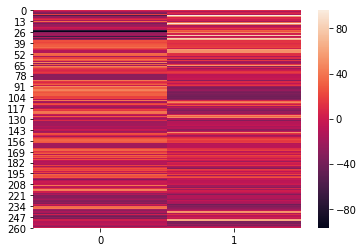

In [20]:
sns.heatmap(pca)